# Starting Objective
### I'm going to create a linear regression classifier based on Andrew Ng's teachings before the linear algebra review... so hopefully that doesn't bite me in the butt. It's going to be using batch gradient descent.

## Details
- Scalable number of features (test up to 3)
- Gradient Descent (batch)
- Cost function (squared error cost function)
- Regression classifier only
- Manual learning rate (alpha)
- ...

## Approach
1) ~~I'm going to first import a standardized linear regression classifier from tensorflow, and configure it appropriately, then ensure i'm getting the proper output.~~ I will create the static training data and testing data.

2) I'm going to build my version of the classifier in python, and work on it until I get the proper results.

(#Test-driven development?)

## Expected Results
1) Greater Python familiarity

~~2) Greater Tensorflow familiarity~~

3) Greater fundamental ML familiarity

4) Resume worthy material

*I will be editing my material minimally to preserve the jouney of my project, think of it as a story =]

In [1]:
# start with importing everything needed
from __future__ import division
#import tensorflow as tf # for bonafide classifiers
import numpy as np # matrices and calculus

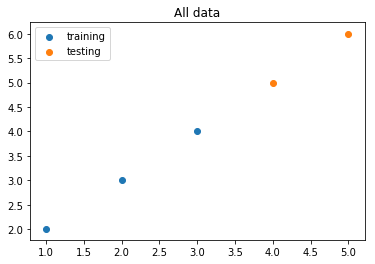

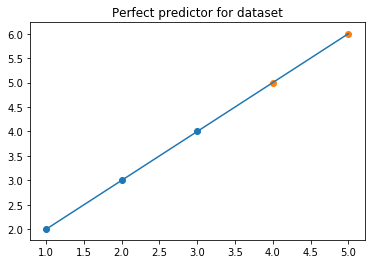

In [10]:
# creating data
X = [1, 2, 3, 4, 5]
Y = [2, 3, 4, 5, 6]
Xtr = X[0:3]
Ytr = Y[0:3]
Xte = X[3:5]
Yte = Y[3:5]

import matplotlib.pyplot as plt # to visualize data, I know it's bad practice just documenting the journey
plt.figure(1)
plt.title("All data")
plt.scatter(Xtr,Ytr, label="training")
plt.scatter(Xte,Yte, label="testing")
plt.legend()

plt.figure(2)
plt.title("Perfect predictor for dataset")
plt.scatter(Xtr,Ytr, label="training")
plt.scatter(Xte,Yte, label="testing")
plt.plot(X,Y)

plt.show()

<font color='red'>
At this point (after 3hr of trying to brute force Tensorflow instead of understanding it) I realized how much time it was going to take to dive deep into Tensorflow. So instead decided to choose another option to save time. Keras didn't do the trick either- but at least I got it working. I thought if I just made one layer it might act like a linear classifier, but I was very very wrong ...
</font>

## It is obvious that perfect linear predictor would have the weights of: theta0 = 1, theta1 = 1.

In [3]:
def correct_predictor_single(x):
    theta0 = 1
    theta1 = 1
    return theta0 + theta1 * x

In [4]:
def correct_predictor(x):
    x = np.asarray(x)
    predictions = correct_predictor_single(x)
    print(predictions)

In [5]:
yCorrect = correct_predictor(Xte)
print(Yte)

[5 6]
[5, 6]


## As above shows, the "obvious statement" was accurate. (I'm just modeling it to predict my test data, nothing else. Or else would be extremely overfit)

In [6]:
def naive_predictor(x, theta):
    x = np.matrix(x)
    x = x.T
    x = np.insert(x, 0, 1, axis=1)
    theta = np.matrix(theta)
    theta = theta.T
    return np.matmul(x, theta)

In [7]:
y = naive_predictor([1,2], [1,1])
print(y) 

[[2]
 [3]]


## Above is a naive predictor that uses matrix multiplication as opposed to standard computation, which will be used for prediction. As is demonstrated, multiple elements can be predicted at once.

In [8]:
class linear_classifier:
    
    theta = [0, 0]
    alpha = 0.01
    epoch = 300
    
    def predict(self, x):
        return naive_predictor(x, self.theta)
    
    def train(self, Xtr, Ytr):
        Ytr = np.matrix(Ytr)
        Xtr = np.matrix(Xtr)
        Ytr = Ytr.T
        self.gradient_des(Xtr, Ytr)
        
    def cost_fcn(self, Yhat, Ytr):
        squaredError = (Yhat - Ytr)**2
        b = 1/(Yhat.size*2);
        return b * np.sum(squaredError, 0);
    
    def gradient_des(self, Xtr, Ytr):
        for i in range(0, self.epoch):
            Yhat = self.predict(Xtr)
            size = Xtr.shape[1]
            self.theta = self.theta - (self.alpha * (1/size) * np.matmul((Yhat - Ytr).T, Xtr.T) )

In [9]:
model = linear_classifier()
print("Original prediction")
print(model.predict([1,2]))

model.train(Xtr, Ytr)
print("Trained prediction")
print(model.predict([1,2]))

Original prediction
[[0]
 [0]]
Trained prediction
[[2.]
 [3.]]


## As shown above, gradient descent was effective and the model managed to predict accurately. I'll now add a couple more functions to show the error went down as expected by plotting the cost function. 

In [42]:
class linear_classifier2:
    
    theta = [0, 0]
    alpha = 0.01
    epoch = 300
    
    def predict(self, x):
        return naive_predictor(x, self.theta)
    
    def train(self, Xtr, Ytr):
        Ytr = np.matrix(Ytr)
        Xtr = np.matrix(Xtr)
        Ytr = Ytr.T
        self.gradient_des(Xtr, Ytr)
        
    def cost_fcn(self, Yhat, Ytr):
        squaredError = (Yhat - Ytr)**2
        b = 1/(Yhat.size*2);
        return b * np.sum(squaredError, 0);
    
    def gradient_des(self, Xtr, Ytr):
        j2 = np.zeros(self.epoch)
        i2 = np.zeros(self.epoch)
        for i in range(0, self.epoch):
            Yhat = self.predict(Xtr)
            size = Xtr.shape[1]
            self.theta = self.theta - (self.alpha * (1/size) * np.matmul((Yhat - Ytr).T, Xtr.T) )
            j2[i] = self.cost_fcn(Yhat.A1, Ytr.A1) # .A1 turns matrix -> array
            i2[i] = i
        plt.xlabel("iterations")
        plt.ylabel("Error")
        plt.plot(i2, j2)

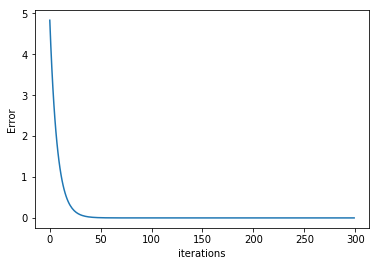

In [43]:
model = linear_classifier2()
model.train(Xtr, Ytr)

## Above shows we could lower epoch, and that our gradient descent indeed did work in this example.  Due to how simple our example is, we can even use the normal equation (Octave code: theta = pinv(X'*X)*(X'*y); )